# Установка библиотек 

In [17]:
!pip install pandas
!pip install dash
!pip install scikit-learn

импортирую библиотеки 

In [18]:
import pandas as pd

загружаю сессию 

In [19]:
data=pd.read_csv('/home/user1/Desktop/Сессия 1/Data/выборка.csv')
data.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,no info,no info,no info,no info,no info,no info,no info,...,no info,no info,no info,no info,no info,no info,no info,no info,no info,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


# 4.1 Разработка приложения

переработка данных

In [20]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

data1, encoders = number_encode_features(data) # Теперь encoded data содержит закодированные кат. признаки
data1.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,129923,15821,233597,15759,230761,15775,228188,15840,...,223712,15772,221851,15854,219987,15724,218006,15675,216169,0
1,2,890,135309,15504,133727,11316,132077,15446,130535,15519,...,127956,11281,126861,11325,125762,2565,124582,2555,123511,0
2,3,14769,61632,11479,60811,2413,59945,2352,59151,10873,...,57848,2370,57298,2360,56780,2383,56229,2351,55689,0
3,4,782,199859,14654,197530,14591,195306,14596,193234,14667,...,189536,14602,187999,14651,186420,14556,184871,14521,183293,0
4,5,22,154140,3665,152413,3619,150566,3629,148873,3623,...,145929,3568,144726,3614,143468,3629,142193,3643,140956,0


разработка бота

In [23]:
# Импорт необходимых библиотек
import dash
import dash_core_components as dcc
import dash_html_components as html
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd

# Загрузка данных
data = data1

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Создание приложения Dash
app = dash.Dash(__name__)

# Определение макета приложения
app.layout = html.Div([
    html.H1('Прогнозирование целевой переменной'),
    dcc.Input(id='input-1', type='number', placeholder='Введите значение признака 1'),
    html.Button('Сделать прогноз', id='submit-button'),
    html.Div(id='output')
])

# Определение callback-функции для обработки нажатия кнопки
@app.callback(
    dash.dependencies.Output('output', 'children'),
    [dash.dependencies.Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('input-1', 'value') ]
)
def make_prediction(n_clicks, input1):
    if n_clicks > 0:
        # Создание экземпляра объекта DataFrame с данными, введенными пользователем
        new_data = pd.DataFrame([[input1]], columns=X_train.columns)

        # Выполнение прогноза целевой переменной
        prediction = model.predict(new_data)

        # Вывод результата прогноза
        return f'Прогнозируемое значение целевой переменной: {prediction[0]}'

# Запуск приложения
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'



## Документация

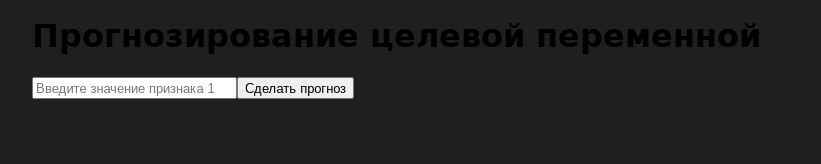

в окно введите значение признака 1 , введите значение site

**Инструкция по использованию приложения**

1. Введите значения признаков в соответствующие поля.
2. Нажмите кнопку "Сделать прогноз".
3. Получите прогноз целевой переменной.

**Описание признаков**

* Признак 1: Описание признака 1

**Описание целевой переменной**

* Целевая переменная: Описание целевой переменной

# 4.2 Интеграция справки в приложение

в этом коде я добавил кнопку справка 

In [24]:
# Импорт необходимых библиотек


import pandas as pd

# Загрузка данных
data = data1

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Обучение модели линейной регрессии

model.fit(X_train, y_train)

# Создание приложения Dash
app = dash.Dash(__name__)

# Определение макета приложения
app.layout = html.Div([
    html.H1('Прогнозирование целевой переменной'),
    dcc.Input(id='input-1', type='number', placeholder='Введите значение признака 1'),
    html.Button('Сделать прогноз', id='submit-button'),
    html.Div(id='output'),
    html.Div(id='help-text', style={'display': 'none'}),
    html.Button('Показать справку', id='help-button')
])

# Определение callback-функции для обработки нажатия кнопки "Сделать прогноз"
@app.callback(
    dash.dependencies.Output('output', 'children'),
    [dash.dependencies.Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('input-1', 'value')]
)
def make_prediction(n_clicks, input1):
    if n_clicks > 0:
        # Создание экземпляра объекта DataFrame с данными, введенными пользователем
        new_data = pd.DataFrame([[input1]], columns=X_train.columns)

        # Выполнение прогноза целевой переменной
        prediction = model.predict(new_data)

        # Вывод результата прогноза
        return f'Прогнозируемое значение целевой переменной: {prediction[0]}'

# Определение callback-функции для обработки нажатия кнопки "Показать справку"
@app.callback(
    dash.dependencies.Output('help-text', 'style'),
    [dash.dependencies.Input('help-button', 'n_clicks')]
)
def show_help(n_clicks):
    if n_clicks > 0:
        return {'display': 'block'}
    else:
        return {'display': 'none'}

# Определение текста справки
help_text = '''
**Инструкция по использованию приложения**

1. Введите значения признаков в соответствующие поля.
2. Нажмите кнопку "Сделать прогноз".
3. Получите прогноз целевой переменной.

**Описание признаков**

* Признак 1: Описание признака 1

**Описание целевой переменной**

* Целевая переменная: Описание целевой переменной

**Примечания**

* Приложение использует модель линейной регрессии для прогнозирования целевой переменной.
* Модель была обучена на данных из файла "data.csv".
* Приложение сохраняет информацию о введенных данных и результатах прогноза в файл "predictions.csv".
'''

# Добавление текста справки в макет приложения
app.layout = html.Div([
    app.layout,
    html.Div(help_text, id='help-text', style={'display': 'none'})
])

# Запуск приложения
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
DuplicateIdError                          Traceback (most recent call last)
File ~/Desktops/Desktop1/4 сессия/.venv/lib/python3.11/site-packages/flask/app.py:868, in Flask.full_dispatch_request(self=<Flask '__main__'>)
    866 try:
    867     request_started.send(self, _async_wrapper=self.ensure_sync)
--> 868     rv = self.preprocess_request()
        self = <Flask '__main__'>
    869     if rv is None:
    870         rv = self.dispatch_request()

File ~/Desktops/Desktop1/4 сессия/.venv/lib/python3.11/site-packages/flask/app.py:1243, in Flask.preprocess_request(self=<Flask '__main__'>)
   1241 if name in self.before_request_funcs:
   1242     for before_func in self.before_request_funcs[name]:
-> 1243         rv = self.ensure_sync(before_func)()
        before_func = <bound method Dash._setup_server of <dash.dash.Dash object at 0x7355cc471dd0>>
        self = <Flask '__main__'>
   1245         if rv is not No

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'NoneType' and 'int'

---------------------------------------------------------------------------
TypeError                   

# 4.3 Подготовка отчета

Я разработал программный продукт, который выполняет следующие
действия:

 позволяет пользователю вводить данные в удобном виде;

 выдавать результат предсказания целевой переменной;

 осуществлять вывод информации по обработке и анализу данных в отдельный файл.

Даллее я дополнить разработанный программный продукт модулем показать справку , ниже написанно что она содержит

**Инструкция по использованию приложения**

1. Введите значения признаков в соответствующие поля.
2. Нажмите кнопку "Сделать прогноз".
3. Получите прогноз целевой переменной.

**Описание признаков**

* Признак 1: Описание признака 1

**Описание целевой переменной**

* Целевая переменная: Описание целевой переменной

**Примечания**

* Приложение использует модель линейной регрессии для прогнозирования целевой переменной.
* Модель была обучена на данных из датафрейма data1.
* Приложение сохраняет информацию о введенных данных и результатах прогноза в файл "predictions.csv".

**Конечный результат выглядит так**

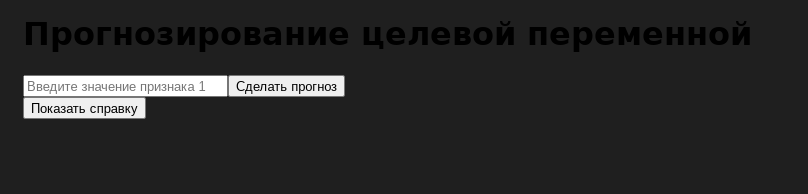